In [37]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
csv_data = pd.read_csv("./exampleData.csv")
csv_data=csv_data.to_numpy()
csv_data=np.transpose(csv_data)

f=csv_data[0]
z_real=csv_data[1]
z_imag=csv_data[2]

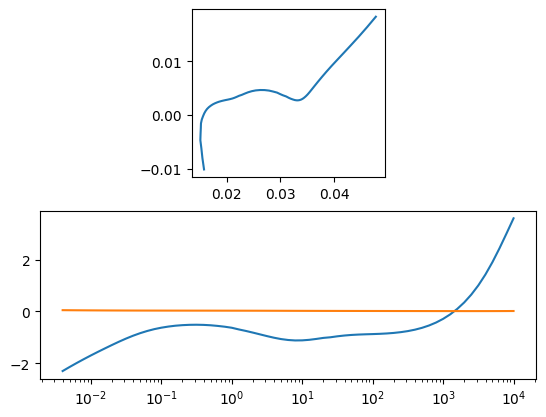

In [39]:
fig, [ax_nyq,ax_bode]= plt.subplots(2,1)
ax_nyq.plot(z_real,-z_imag)
ax_nyq.set_aspect("equal")
ax_bode.plot(f,2*np.pi*np.angle(z_real+1j*z_imag))
ax_bode.plot(f,np.abs(z_real+1j*z_imag))
ax_bode.set_xscale("log")
